In [ ]:
!pip install -q datasets

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the SQuAD 1.1 Dataset

In this part of the code, we're bringing in the SQuAD (Stanford Question Answering Dataset) version 1.1, a popular resource for training and testing question-answering models. SQuAD features questions created by crowdworkers based on a variety of Wikipedia articles, with each question linked to a specific answer found in the text.

Here's what the code does:

1. **Load the Dataset**: We use the `load_dataset` function to load the SQuAD 1.1 dataset into our environment. This makes it easy to access the data we need for our project.
  
2. **Separate Training and Validation Data**: The dataset is split into two main parts:
   - `train_data`: This is our training set, where we'll teach our models how to answer questions.
   - `validation_data`: This part helps us check how well our models are doing by testing them on data they haven't seen before.

By loading and organizing the dataset this way, we set ourselves up for successful training and evaluation of our question-answering models!


In [2]:
# Load SQuAD1.1 dataset
squad = load_dataset("squad")

train_data = squad["train"]

validation_data = squad["validation"]




README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

C:\Apps\Anaconda\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mohds\.cache\huggingface\hub\datasets--squad. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

## Dataset Exploration

In [3]:
# Checking traning data
train_data

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 87599
})

In [4]:
# Checking validation data
validation_data

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 10570
})

In [5]:
# Priniting type, no of examples, features of train dataset
print('Type of dataset : ', type(train_data))
print('\n\n' ,'<', '='*100, '>')

print('No. of examples in Traning : ', len(train_data))
print('\n\n' ,'<', '='*100, '>')

train_data.features



Type of dataset :  <class 'datasets.arrow_dataset.Dataset'>


 < ==================================================================================================== >
No. of examples in Traning :  87599


 < ==================================================================================================== >


{'id': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None),
 'context': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None)}

### Exploring the Question and Answer Pairs

In this section of the code, we're diving into the structure of our training dataset to understand how questions and answers are presented. This exploration will help us get familiar with the data we’re working with.

Here’s a breakdown of what the code does:

1. **Formatting Text**: We define formatting options to make certain parts of our output bold. This way, key information stands out, making it easier to read.

2. **Displaying a Sample**: We start by printing a header that indicates we’re looking at a sample from the training data.

3. **Length of Training Dataset**: We then display the total number of entries in the training dataset. This gives us an idea of the size of our dataset.

4. **Iterating Through the Data**: The code loops through the first five entries of the training data, printing out:
   - **ID**: A unique identifier for each entry.
   - **Title**: The title of the Wikipedia article from which the question is derived.
   - **Context**: The relevant passage of text that contains the answer.
   - **Questions**: The question that is asked based on the context.
   - **Answers**: The correct answer(s) to the question, as provided in the dataset.
   - **Answer Start Index**: The position in the context where the answer begins.

By looking at these details, we gain insights into how questions are formulated and how they relate to the given context, which is crucial for building effective question-answering models.


In [6]:
# Exploring how are question and answers given
# to make text bold
s_bold = '\033[1m'
e_bold = '\033[0;0m'
i = 0

print(s_bold + 'Train Data Sample.....' + e_bold)


print(s_bold + 'Length of Training Dataset: ' + str(len(train_data)) + e_bold)


for data in train_data:
    print(' ')
    print(s_bold + 'ID -' + e_bold, data['id'])
    print(s_bold + 'Title -' + e_bold, data['title'])
    print(s_bold + 'CONTEXT - '+ e_bold,data['context'])
    print(s_bold + 'QUESTIONS - ' + e_bold,data['question'])
    print(s_bold + 'ANSWERS - ' + e_bold,data['answers']['text'])
    print(s_bold + 'ANSWERS START INDEX - ' + e_bold,data['answers']['answer_start'])
    print(' ')
    i += 1  # Increment the counter
    if i == 5:
        break


Train Data Sample.....
Length of Training Dataset: 87599
 
ID - 5733be284776f41900661182
Title - University_of_Notre_Dame
CONTEXT -  Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
QUESTIONS -  To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
ANSWERS -  ['Saint Bernadette Soubirous']
ANSWERS START INDEX -  [515]
 
 
ID - 5733be

### Structuring the Training and Validation Datasets

This section organizes the training and validation datasets into structured tables (DataFrames) for easier analysis.

#### Training Dataset Steps

1. **Initialize List**: Create an empty list `train_rows` for structured data.
  
2. **Data Iteration**: Loop through the training data to extract:
   - **ID**: Unique identifier.
   - **Title**: Source article title.
   - **Context**: Relevant text.
   - **Question**: Associated question.
   - **Answer**: Specific answer.
   - **Answer Start Index**: Position of the answer.
   - **Len_Context**: Word count of the context.
   - **Len_Answer**: Word count of the answer.

3. **Create DataFrame**: Convert `train_rows` into `train_df`.

4. **Display Shape**: Print the shape of `train_df`.

#### Validation Dataset Steps

The validation dataset is structured similarly:

1. **Initialize List**: Create an empty list `validation_rows`.

2. **Data Iteration**: Loop through the validation data to structure it like the training data.

3. **Create DataFrame**: Convert `validation_rows` into `val_df`.

4. **Display Shape**: Print the shape of `val_df`.

This structured format aids in efficient data manipulation and analysis.


In [7]:
# Create an empty list to hold the rows
train_rows = []

# Iterate over the training data and collect relevant fields
for data in train_data:
    # For each answer in the list, create a new row
    for answer, start_index in zip(data['answers']['text'], data['answers']['answer_start']):
        # Append a dictionary for each entry
        train_rows.append({
            'ID': data['id'],
            'Title': data['title'],
            'Context': data['context'],
            'Question': data['question'],
            'Answer': answer,
            'Answer Start Index': start_index,
            'Len_Context': len(data['context'].split()),
            'Len_Answer': len(answer.split())
        })

# Convert the list of dictionaries into a DataFrame
train_df = pd.DataFrame(train_rows)

# Display the DataFrame
train_df.sample(5)


,ID,Title,Context,Question,Answer,Answer Start Index,Len_Context,Len_Answer
67599,572a22256aef0514001552f9,Ottoman_Empire,The effective military and bureaucratic struct...,Europeans gained on the Ottoman empire in what...,military technology,200,78,2
14174,56e02cb57aa994140058e2fc,Saint_Helena,Englishman Sir Francis Drake probably located ...,Who developed a far east trade and began to fr...,the Dutch,378,121,2
41468,57260a8fec44d21400f3d82e,Korean_War,Korea was ruled by Japan from 1910 until the c...,What United Nation's committee considered the ...,United Nations Security Council,609,169,4
18779,56f7397c711bf01900a44a8b,Slavs,Because of the vastness and diversity of the t...,Pan-Slavism became compromised when what empir...,Russian Empire,383,166,2
60228,5727c2efff5b5019007d9491,Tibet,Although spoken Tibetan varies according to th...,What influenced the consistency of the written...,Tibetan empire,191,94,2


In [8]:
# Create an empty list to hold the rows for the validation dataset
validation_rows = []

# Iterate over the validation data and collect relevant fields
for data in validation_data:
    # For each answer in the list, create a new row
    for answer, start_index in zip(data['answers']['text'], data['answers']['answer_start']):
        # Append a dictionary for each entry
        validation_rows.append({
            'ID': data['id'],
            'Title': data['title'],
            'Context': data['context'],
            'Question': data['question'],
            'Answer': answer,
            'Answer Start Index': start_index,
            'Len_Context': len(data['context'].split()),
            'Len_Answer': len(answer.split())
        })

# Convert the list of dictionaries into a DataFrame for the validation dataset
val_df = pd.DataFrame(validation_rows)

# Display the DataFrame shape
val_df.shape


(34726, 8)

### Validation Data Sample and Duplicate Removal

In this section, we examine a sample entry from the validation dataset, showcasing its structure, including the ID, title, context, question, and answers. We then remove duplicate entries based on the 'Question' and 'Answer' columns to ensure a clean dataset for further analysis.


In [9]:
validation_data[89]

{'id': '56beaf5e3aeaaa14008c9201',
 'title': 'Super_Bowl_50',
 'context': 'CBS broadcast Super Bowl 50 in the U.S., and charged an average of $5 million for a 30-second commercial during the game. The Super Bowl 50 halftime show was headlined by the British rock group Coldplay with special guest performers Beyoncé and Bruno Mars, who headlined the Super Bowl XLVII and Super Bowl XLVIII halftime shows, respectively. It was the third-most watched U.S. broadcast ever.',
 'question': "Who was the main performer at this year's halftime show?",
 'answers': {'text': ['Coldplay', 'Coldplay', 'Coldplay'],
  'answer_start': [194, 194, 194]}}

In [10]:
# Remove duplicate rows based on 'Question' and 'Answer'
val_df_unique = val_df.drop_duplicates(subset=['Question', 'Answer'])

# Display the shape of the new DataFrame after removing duplicates
val_df_unique.shape


(17968, 8)

### Context and Question Display

In this section, we define a function that extracts and displays the context along with related questions and answers from our dataset. The function takes an index as input, retrieves the corresponding context, and lists all associated questions and answers without scroll bars for better visibility. We then randomly select a couple of indices from the training dataset to demonstrate the function, allowing us to see how questions and answers are structured around specific contexts.


In [11]:
# Function to display context and questions without scroll bars
def context_func(df, context_index):
    context = df.iloc[context_index]['Context']
    questions = df[df['Context'] == context]['Question']
    answers = df[df['Context'] == context]['Answer']

    print(s_bold + 'Context:' + e_bold)

    # Display context without scroll bar
    display(HTML(f"<div style='max-height: none; overflow: visible;'><p>{context}</p></div>"))
    print('\n', s_bold + 'Questions on the context:' + e_bold)

    # Display all questions
    for i, ques in enumerate(questions):
        print(f'Question {i+1}:', ques)

    print('\n', s_bold + 'Answers to the questions:' + e_bold)
    for i, ans in enumerate(answers):
        print(f'Answer {i+1}:', ans)


#---------------------------------------------------------------------------------------#
# Generate 5 random integers from the range [0, 100)
random_ids = np.random.choice(1000, size=2, replace=False)


for id in random_ids:
  context_func(train_df, id)
  print('\n\n' ,'<', '='*100, '>')


Context:



 Questions on the context:
Question 1: When did the Scholastic Magazine of Notre dame begin publishing?
Question 2: How often is Notre Dame's the Juggler published?
Question 3: What is the daily student paper at Notre Dame called?
Question 4: How many student news papers are found at Notre Dame?
Question 5: In what year did the student paper Common Sense begin publication at Notre Dame?

 Answers to the questions:
Answer 1: September 1876
Answer 2: twice
Answer 3: The Observer
Answer 4: three
Answer 5: 1987


 < ==================================================================================================== >
Context:



 Questions on the context:
Question 1: Jay Z and Beyonce attended which event together in August of 2011?
Question 2: Beyonce confirmed what after performing one of her songs?
Question 3: How many people watched the 2011 MTV Music Awards?
Question 4: Where did she announce her pregnancy?
Question 5: Why was the broadcast the most-watched in history?
Question 6: What even was recorded in the Guinness World Records?
Question 7: What was the most searched term in week of Aug 29, 2011?
Question 8: What song did she perform at the MTV Awards?
Question 9: Where did Beyoncé announce her pregnancy?
Question 10: What song did Beyoncé sing prior to announcing her pregnancy?
Question 11: How many people watched the 2011 MTV Video Music Awards?
Question 12: What was the most searched term on Google for the week of August 29, 2011?

 Answers to the questions:
Answer 1: MTV Video Music Awards
Answer 2: her pregnancy
Answer 3: 12.4 million
Answer 4: 2011 MTV Video Music Awards
Answer 5: Her appearan

In [ ]:

# Generate 5 random integers from the range [0, 100)
random_ids = np.random.choice(1000, size=2, replace=False)


for id in random_ids:
  context_func(val_df_unique, id)
  print('\n\n' ,'<', '='*100, '>')

Context:



 Questions on the context:
Question 1: Which Louisiana venue was one of three considered for Super Bowl 50?
Question 2: Which Louisiana venue was one of three considered for Super Bowl 50?
Question 3: Which Florida venue was one of three considered for Super Bowl 50?
Question 4: Which Florida venue was one of three considered for Super Bowl 50?
Question 5: Which California venue was one of three considered for Super Bowl 50?
Question 6: Which California venue was one of three considered for Super Bowl 50?
Question 7: What venue in Miami was a candidate for the site of Super Bowl 50?
Question 8: What site is located in the San Francisco Bay Area?
Question 9: What is the name of San Francisco's stadium when looked at as a possibility for Super Bowl 50?
Question 10: What is the name of San Francisco's stadium when looked at as a possibility for Super Bowl 50?
Question 11: What was the name of New Orleans' superdome at the time that Super Bowl 50 took place?
Question 12: What was the give


 Questions on the context:
Question 1: How many yards did the Broncos' defense give up?
Question 2: How many sacks did Derek Wolfe register?
Question 3: Who was first on the team in total tackles?
Question 4: Who was first on the team in total tackles?
Question 5: How many picks did Aqib Talib have?
Question 6: What position does DeMarcus currently play? 
Question 7: What position does Brandon Marshall currently play? 
Question 8: What is the position Derek Wolfe plays currently? 
Question 9: How many points did the Broncos defense allow their opponents to get?
Question 10: Which linebacker had the most sacks on the team?
Question 11: Which linebacker had the most sacks on the team?
Question 12: Which linebacker led the Broncos in tackles?
Question 13: Which linebacker led the Broncos in tackles?
Question 14: How many interceptions did Aqib Talib have for the regular season?
Question 15: How many interceptions did Aqib Talib have for the regular season?
Question 16: Who forced four fu

### Analyzing Question Counts by Title

In this section, we analyze the number of unique questions associated with each title in the training dataset. We start by printing the count of unique titles. Then, we create a DataFrame to display the frequency of questions per title in both the training and validation datasets. The resulting DataFrame provides a clear overview of how many questions are tied to each title, allowing for a comparative analysis between the two datasets.


In [ ]:
print('\n' + s_bold + 'Questions on the context: {}'.format(train_df['Title'].nunique()) + e_bold)

# To print the value counts sorted by the 'Title' column

title_df = pd.DataFrame(train_df['Title'].value_counts().sort_values(ascending=False))
title_df.columns = ['Train Counts']

title_df['Validation Counts'] = val_df['Title'].value_counts().sort_values(ascending=False)

title_df


Questions on the context: 442


,Train Counts,Validation Counts
Title,,
New_York_City,817,NaN
American_Idol,802,NaN
Beyoncé,758,NaN
Frédéric_Chopin,697,NaN
Queen_Victoria,680,NaN
Buddhism,610,NaN
"New_Haven,_Connecticut",602,NaN
2008_Sichuan_earthquake,521,NaN
2008_Summer_Olympics_torch_relay,500,NaN


### Counting Questions per Title in the Validation Dataset

next, we create a DataFrame to count the occurrences of each title in the validation dataset. The counts are sorted in descending order, providing a clear view of which titles have the most associated questions. This analysis helps in understanding the distribution of questions across different titles in the validation set.


In [ ]:
title_val_df = pd.DataFrame(val_df['Title'].value_counts().sort_values(ascending=False))
title_val_df.columns = ['Train Counts']
title_val_df

,Train Counts
Title,
Super_Bowl_50,2438
Nikola_Tesla,1522
Martin_Luther,1448
American_Broadcasting_Company,1216
Oxygen,1187
Apollo_program,1173
Civil_disobedience,967
Rhine,963
Doctor_Who,960


### Visualizing Length Distributions of Contexts and Answers

In this section, we create histograms to visualize the distributions of context and answer lengths in both the training and validation datasets. The left subplot displays the context length distribution, while the right subplot shows the answer length distribution. These visualizations help in understanding the variability in lengths, which is crucial for analyzing the quality and comprehensiveness of the data.


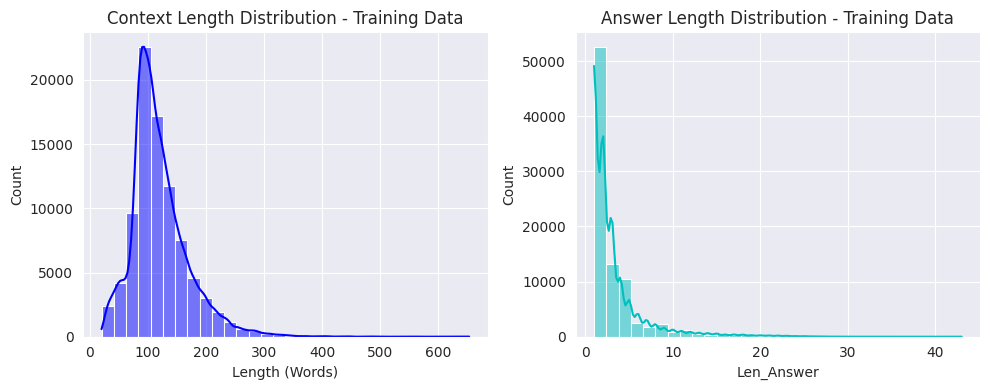

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('darkgrid')

# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the context length distribution
sns.histplot(data=train_df, x='Len_Context', ax=axes[0], fill=True, bins=30, kde=True, color='b')
axes[0].set_title('Context Length Distribution - Training Data')
axes[0].set_xlabel('Length (Words)')

# Plot the answer length distribution
sns.histplot(data=train_df, x='Len_Answer', ax=axes[1], fill=True, bins=30, kde=True, color='c')
axes[1].set_title('Answer Length Distribution - Training Data')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show();


In [ ]:
!pip install -q plotly

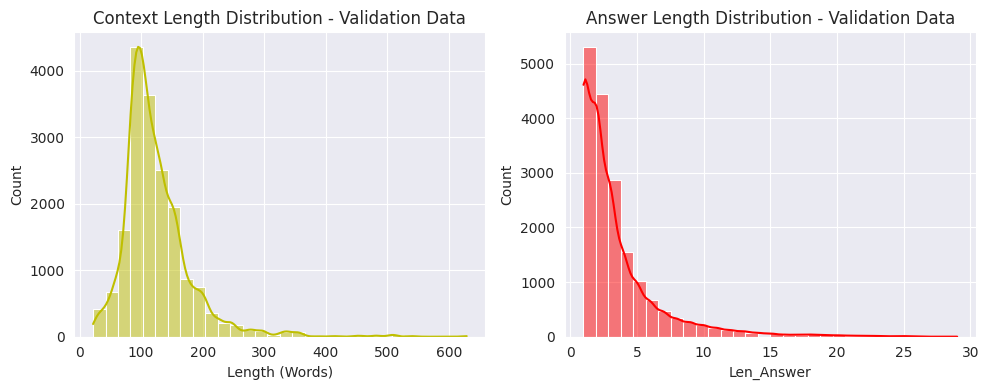

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('darkgrid')

# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the context length distribution
sns.histplot(data=val_df_unique, x='Len_Context', ax=axes[0], fill=True, bins=30, kde=True, color='y')
axes[0].set_title('Context Length Distribution - Validation Data')
axes[0].set_xlabel('Length (Words)')

# Plot the answer length distribution
sns.histplot(data=val_df_unique, x='Len_Answer', ax=axes[1], fill=True, bins=30, kde=True, color='r')
axes[1].set_title('Answer Length Distribution - Validation Data')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show();


## Findings from the SQuAD1.1 Dataset Exploration

In our exploration of the SQuAD1.1 dataset, we analyzed the training and validation sets, which consist of 87,599 and 10,570 entries, respectively. Each entry includes an ID, title, context, question, and answer, providing a rich foundation for understanding how questions are formed and answered based on a given context.

### Unique Questions and Contexts
One notable finding is the high volume of unique questions generated from similar contexts—442 unique titles correspond to numerous questions. This highlights the diverse ways in which information can be queried, reflecting the dataset's complexity and potential for training effective models. It also emphasizes the importance of context in shaping the specificity and relevance of questions.

### Length Distribution of Contexts and Answers
We delved into the lengths of contexts and answers, revealing interesting patterns:
- **Context Lengths**: The distribution of context lengths indicates that most contexts consist of a moderate number of words, which is crucial for model training as it can influence comprehension and response accuracy.
- **Answer Lengths**: The answer lengths varied but were generally concise, aligning with typical question-answering patterns. This can help in designing models that focus on extracting succinct information.

### Variability in Question Formation
Through random sampling of entries, we observed that questions can vary widely even when posed about the same context. For example, multiple questions pertained to specific venues considered for Super Bowl 50, illustrating how the same piece of information can prompt different lines of inquiry. This suggests that models need to be robust enough to handle nuanced variations in queries, ensuring accurate responses across diverse formulations.

### Insights into Training Data
The dataset's structure allows for comprehensive analysis:
- The **Context** provides essential background information, which can be leveraged to formulate relevant questions.
- The **Answers** are often closely tied to specific parts of the context, underscoring the importance of the model's ability to identify and extract key details from the text.

### Conclusion
Overall, this exploratory analysis demonstrates the richness of the SQuAD1.1 dataset, providing a solid basis for training question-answering models. The findings underscore the dataset's potential for various NLP applications, from enhancing understanding in chatbot systems to improving automated information retrieval processes. As we move forward, these insights will guide the design and refinement of our models, ensuring they effectively leverage the wealth of data available.
